In [10]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

%matplotlib inline


mpl.rc("savefig", dpi=100)

sns.set_style("white")

greys = sns.color_palette("Greys", 10)

data = pd.read_csv('../data/yeast.csv', header=None).values

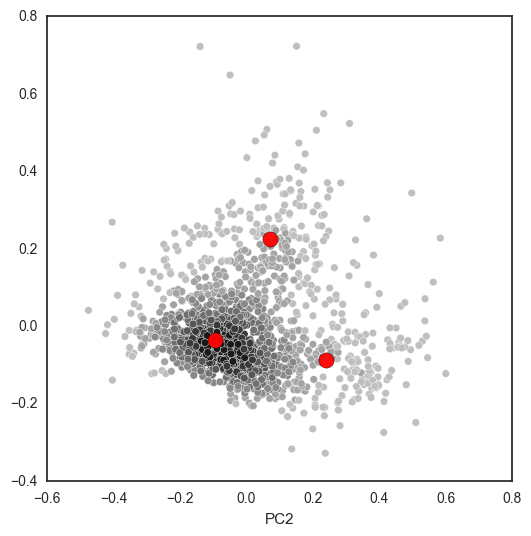

In [11]:
#k-means witk sklearn
kmeans = KMeans(n_clusters=3,n_init=100,algorithm='full')
kmeans.fit(data)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, svd_solver='full')
pca.fit(data)

pcs   = pca.transform(data)
cntrs = pca.transform(kmeans.cluster_centers_)

mycmap=matplotlib.colors.ListedColormap(greys[3:])

x,y=pcs[:,0],pcs[:,1]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

plt.figure(figsize=(6,6),dpi=100)
plt.scatter(x, y, c=z, s=30, edgecolor='white',cmap=mycmap)
plt.scatter(cntrs[:,0],cntrs[:,1],facecolor='red',edgecolor='black',s=120,alpha=0.95)
plt.xlabel('PC1')
plt.xlabel('PC2')

In [12]:
#score
kmeans.inertia_

80.644387968906543

In [14]:
K=3
N,D=data.shape

A = np.zeros((K,D))
W = np.zeros(N,dtype=np.int)
X = data
m = np.zeros(K)

#randomization where we make sure there are points in every cluster
for n in range(N):
    W[n] = n%K
    
def shuffle(x,n):
    for i in range(n-2,-1,-1): #from n-2 to 0
        j= np.random.randint(0,i+1) #from 0<=j<=i
        temp = x[j]
        x[j] = x[i]
        x[i] = temp

shuffle(W,len(W))

converged = False

while not converged:
    converged = True
    
    #compute means
    for k in range(K):
        for d in range(D):
            A[k,d] = 0
        m[k]=0
            
    for n in range(N):
        for d in range(D):
            A[W[n],d]+=X[n,d]
        m[ W[n] ] +=1
    
    for k in range(K):
        for d in range(D):
            A[k,d] = A[k,d]/m[k]
            
    #assign to closest mean
    for n in range(N):
        
        min_val = np.inf
        min_ind = -1
        
        for k in range(K):
            temp =0
            for d in range(D):
                temp += (X[n,d]-A[k,d])**2
            
            if temp < min_val:
                min_val = temp
                min_ind = k
                
        if min_ind != W[n]:
            W[n] = min_ind
            converged=False

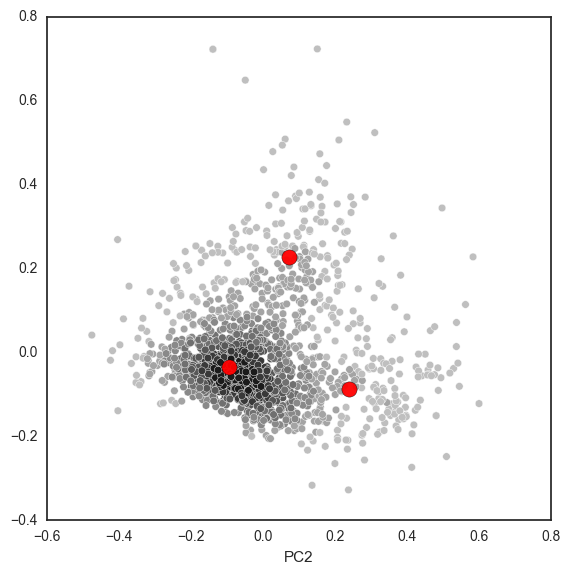

In [15]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(data)

pcs   = pca.transform(data)
cntrs = pca.transform(A)

mycmap=matplotlib.colors.ListedColormap(greys[3:])

x,y=pcs[:,0],pcs[:,1]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

plt.figure(figsize=(6.5,6.5))
plt.scatter(x, y, c=z, s=30, edgecolor='white',cmap=mycmap)
plt.scatter(cntrs[:,0],cntrs[:,1],facecolor='red',edgecolor='black',s=120,alpha=0.95)
plt.xlabel('PC1')
plt.xlabel('PC2')

In [16]:
phi=0

for n in range(N):
    for d in range(D):
        phi += (X[n,d]-A[W[n],d])**2
print(phi)

80.6443879689
